## **Project 2 part 4**

### **Task**
**Modeling**
 
- Fit and evaluate multiple types of models on your data.
- Evaluate each model with multiple appropriate metrics on BOTH the train and test data.
- Use GridSearchCV to tune some of the hyperparameters of each model.
- Display the metrics of your best tuned version of each model type.
- Try feature engineering techniques or PCA to engineer your dataset to see how this impacts your modeling results. 

In [1]:
#Import libraries 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#load the dataset
df =  pd.read_csv(r"C:\Users\USER\Desktop\Crude oil.csv")

In [3]:
#view the first rows of the dataset
df.head()

,ID,time,generation biomass,generation fossil brown coal/lignite,generation fossil coal-derived gas,generation fossil gas,generation fossil hard coal,generation fossil oil,generation fossil oil shale,generation fossil peat,...,generation waste,generation wind offshore,generation wind onshore,forecast solar day ahead,forecast wind offshore eday ahead,forecast wind onshore day ahead,total load forecast,total load actual,price day ahead,price actual
0,ID_000000,2019-01-01 00:00:00,447.0,329.0,0.0,4844.0,4821.0,162.0,0.0,0.0,...,196.0,0.0,6378.0,17.0,NaN,6436.0,26118.0,25385.0,5010.0,6541.0
1,ID_000001,2019-01-01 01:00:00,449.0,328.0,0.0,5196.0,4755.0,158.0,0.0,0.0,...,195.0,0.0,5890.0,16.0,NaN,5856.0,24934.0,24382.0,4810.0,6492.0
2,ID_000002,2019-01-01 02:00:00,448.0,323.0,0.0,4857.0,4581.0,157.0,0.0,0.0,...,196.0,0.0,5461.0,8.0,NaN,5454.0,23515.0,22734.0,4733.0,6448.0
3,ID_000003,2019-01-01 03:00:00,438.0,254.0,0.0,4314.0,4131.0,160.0,0.0,0.0,...,191.0,0.0,5238.0,2.0,NaN,5151.0,22642.0,21286.0,4227.0,5932.0
4,ID_000004,2019-01-01 04:00:00,428.0,187.0,0.0,4130.0,3840.0,156.0,0.0,0.0,...,189.0,0.0,4935.0,9.0,NaN,4861.0,21785.0,20264.0,3841.0,5604.0


In [4]:
#View the number of rows and columns in the dataset.
print(f"There are {df.shape[0]} rows, and {df.shape[1]} columns")

There are 27500 rows, and 30 columns


## Duplicated Rows

In [5]:
## Display the number of duplicate rows in the dataset
print(f'There are {df.duplicated().sum()} duplicate rows.')

There are 0 duplicate rows.


## Columns display

In [6]:
## Display column names
df.columns

Index(['ID', 'time', 'generation biomass',
       'generation fossil brown coal/lignite',
       'generation fossil coal-derived gas', 'generation fossil gas',
       'generation fossil hard coal', 'generation fossil oil',
       'generation fossil oil shale', 'generation fossil peat',
       'generation geothermal', 'generation hydro pumped storage aggregated',
       'generation hydro pumped storage consumption',
       'generation hydro run-of-river and poundage',
       'generation hydro water reservoir', 'generation marine',
       'generation nuclear', 'generation other', 'generation other renewable',
       'generation solar', 'generation waste', 'generation wind offshore',
       'generation wind onshore', 'forecast solar day ahead',
       'forecast wind offshore eday ahead', 'forecast wind onshore day ahead',
       'total load forecast', 'total load actual', 'price day ahead',
       'price actual'],
      dtype='object')

In [7]:
import datetime
df ["time"] = pd.to_datetime(df["time"], errors='coerce')
df ["Year"] = df["time"].dt.year
df ["Month"] = df["time"].dt.month
df ["Day"] = df["time"].dt.day
df ["Hour"] = df["time"].dt.hour

Datetime was imported to split the timeset in the data so that the algorithm can work with well and predict accurately

In [8]:
## Display the descriptive statistics for the non-numeric columns
df.describe(include="number")

,generation biomass,generation fossil brown coal/lignite,generation fossil coal-derived gas,generation fossil gas,generation fossil hard coal,generation fossil oil,generation fossil oil shale,generation fossil peat,generation geothermal,generation hydro pumped storage aggregated,...,forecast wind offshore eday ahead,forecast wind onshore day ahead,total load forecast,total load actual,price day ahead,price actual,Year,Month,Day,Hour
count,27482.00000,27483.000000,27483.0,27483.000000,27483.000000,27482.000000,27483.0,27483.0,27483.0,0.0,...,0.0,27500.000000,27500.000000,27466.000000,27500.000000,27500.000000,27500.000000,27500.000000,27500.000000,27500.000000
mean,396.78022,476.247098,0.0,5555.281119,4411.479242,303.007059,0.0,0.0,0.0,NaN,...,NaN,5469.240545,28639.632291,28621.754715,4764.150436,5610.960327,2020.086982,6.298945,15.644436,11.498545
std,88.97453,363.187665,0.0,2252.850015,2015.548483,53.850784,0.0,0.0,0.0,NaN,...,NaN,3179.516247,4600.880403,4577.680533,1432.890512,1424.710564,0.896392,3.534103,8.792006,6.921752
min,0.00000,0.000000,0.0,1518.000000,0.000000,0.000000,0.0,0.0,0.0,NaN,...,NaN,237.000000,18105.000000,18041.000000,206.000000,933.000000,2019.000000,1.000000,1.000000,0.000000
25%,340.00000,0.000000,0.0,4069.000000,2618.000000,267.000000,0.0,0.0,0.0,NaN,...,NaN,2976.000000,24712.750000,24724.000000,3994.000000,4783.000000,2019.000000,3.000000,8.000000,5.000000
50%,376.00000,558.000000,0.0,4871.000000,4698.000000,303.000000,0.0,0.0,0.0,NaN,...,NaN,4856.000000,28848.500000,28839.500000,4835.000000,5610.500000,2020.000000,6.000000,16.000000,11.000000
75%,475.00000,856.000000,0.0,6269.000000,6062.500000,336.000000,0.0,0.0,0.0,NaN,...,NaN,7365.250000,32151.000000,32082.750000,5700.000000,6530.250000,2021.000000,9.000000,23.000000,17.000000
max,592.00000,999.000000,0.0,20034.000000,8359.000000,449.000000,0.0,0.0,0.0,NaN,...,NaN,17430.000000,41390.000000,41015.000000,10199.000000,11680.000000,2022.000000,12.000000,31.000000,23.000000


## Missing Values

In [9]:
print(f" There are {df.isna().sum()} missing values in the dataset")

 There are ID                                                 0
time                                               0
generation biomass                                18
generation fossil brown coal/lignite              17
generation fossil coal-derived gas                17
generation fossil gas                             17
generation fossil hard coal                       17
generation fossil oil                             18
generation fossil oil shale                       17
generation fossil peat                            17
generation geothermal                             17
generation hydro pumped storage aggregated     27500
generation hydro pumped storage consumption       18
generation hydro run-of-river and poundage        18
generation hydro water reservoir                  17
generation marine                                 18
generation nuclear                                16
generation other                                  17
generation other renewable         

In [10]:
print(f" There are {df.isna().sum()/len(df)*100} missing values in the dataset")

 There are ID                                               0.000000
time                                             0.000000
generation biomass                               0.065455
generation fossil brown coal/lignite             0.061818
generation fossil coal-derived gas               0.061818
generation fossil gas                            0.061818
generation fossil hard coal                      0.061818
generation fossil oil                            0.065455
generation fossil oil shale                      0.061818
generation fossil peat                           0.061818
generation geothermal                            0.061818
generation hydro pumped storage aggregated     100.000000
generation hydro pumped storage consumption      0.065455
generation hydro run-of-river and poundage       0.065455
generation hydro water reservoir                 0.061818
generation marine                                0.065455
generation nuclear                               0.058182
gen

C:\Users\USER\AppData\Local\Temp\ipykernel_6492\874470949.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot = False, cmap = "Blues")


<Axes: >

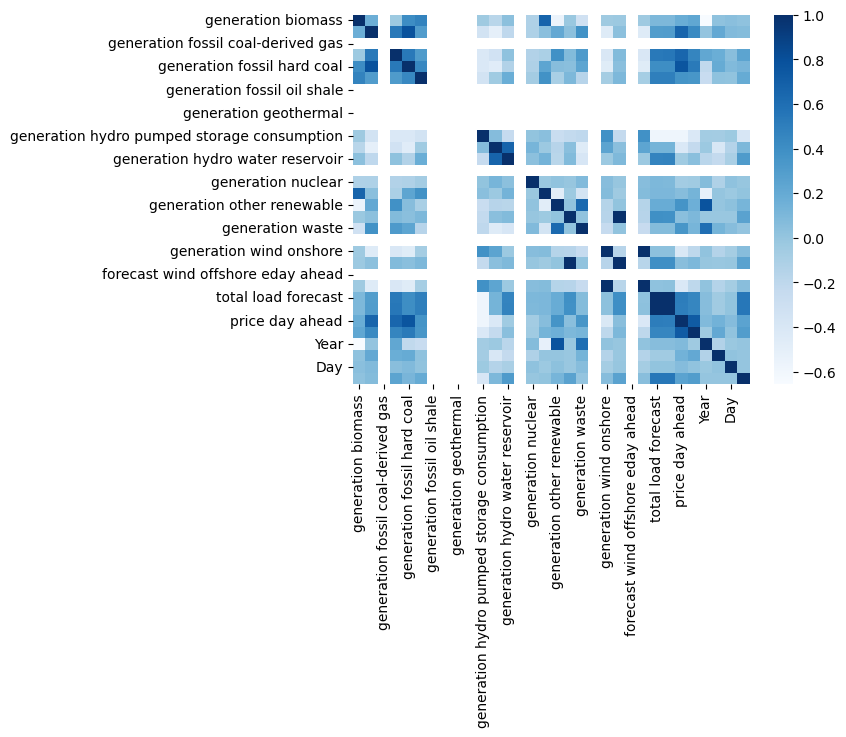

In [11]:
sns.heatmap(df.corr(), annot = False, cmap = "Blues")

### **Delete unneccessary columns**

Variable columns with missing data more than 70% will be dropped. Also variable that has 0.1- 0.3 correction with the target variable will be dropped

In [12]:
df.drop(["ID", "generation hydro pumped storage aggregated", "forecast wind offshore eday ahead"], axis = 1, inplace = True)

In [13]:
df.drop(["generation geothermal", "generation fossil peat", "generation fossil oil shale", "generation wind offshore"], axis = 1, inplace = True)

In [14]:
df.drop(["generation marine", "generation fossil brown coal/lignite", "generation fossil coal-derived gas", "time"], axis = 1, inplace = True)

## Outliers

from the descriptive analysis of the data, I found out that there are outliers in the variable columns. Exploratory analysis of columns will be done

In [15]:
def remove_outliers(df, columns, threshold=3):
    # Create a copy of the DataFrame to work with
    df_cleaned = df.copy()

    # Loop through the specified columns
    for col in columns:

        # Calculate the z-score for each value in the column
        z_scores = np.abs((df[col] - df[col].mean()) / df[col].std())

        # Identify the outliers using the specified threshold
        outliers = z_scores > threshold

        # Replace the outliers with NaN
        df_cleaned[col][outliers] = np.nan

    # Drop any rows with NaN values
    df_cleaned = df_cleaned.dropna()

    return df_cleaned

In [16]:
cleaned_df = remove_outliers(df, ['generation biomass','generation fossil gas',
       'generation fossil hard coal', 'generation fossil oil',
       'generation hydro pumped storage consumption',
       'generation hydro run-of-river and poundage',
       'generation hydro water reservoir', 'generation nuclear',
       'generation other', 'generation other renewable', 'generation solar',
       'generation waste', 'generation wind onshore',
       'forecast solar day ahead', 'forecast wind onshore day ahead',
       'total load forecast', 'total load actual', 'price day ahead'], threshold=2.5)

C:\Users\USER\AppData\Local\Temp\ipykernel_6492\1626267073.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned[col][outliers] = np.nan


Remove outliers from multiple columns in a Pandas DataFrame using the z-score method.
  Parameters:
    - df: a Pandas DataFrame
    - columns: a list of column names to remove outliers from
    - threshold: the z-score threshold to use for outlier removal. Default is 3.
 Returns:


## Exploratory Data Analysis

C:\Users\USER\AppData\Local\Temp\ipykernel_6492\3665200334.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["generation biomass"], kde = True, bins= 500)


<function matplotlib.pyplot.show(close=None, block=None)>

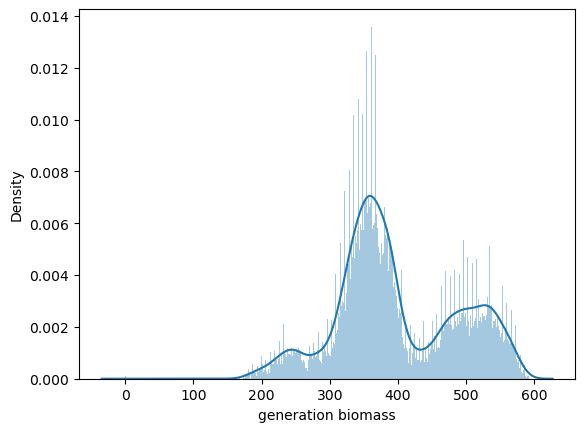

In [17]:
#distribution plot of generation biomass
sns.distplot(df["generation biomass"], kde = True, bins= 500)
plt.show

C:\Users\USER\AppData\Local\Temp\ipykernel_6492\1991567670.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["generation fossil gas"], kde = True, bins= 500)


<function matplotlib.pyplot.show(close=None, block=None)>

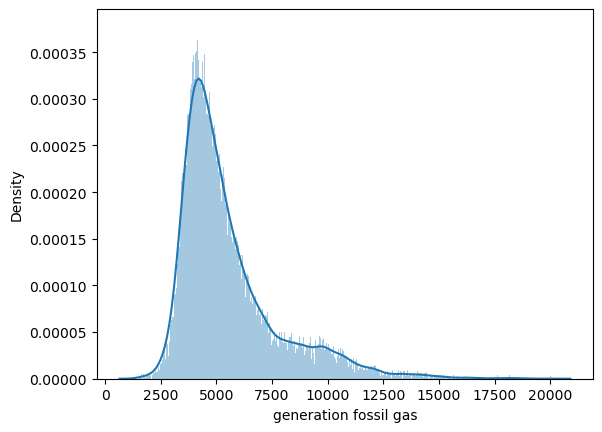

In [18]:
#distribution plot of generation fossil gas
sns.distplot(df["generation fossil gas"], kde = True, bins= 500)
plt.show

The distribution plot of generation biomass and generation fossil gas show a normal distribution but that generation fossil gas is skewed to the left

<Axes: xlabel='generation fossil hard coal'>

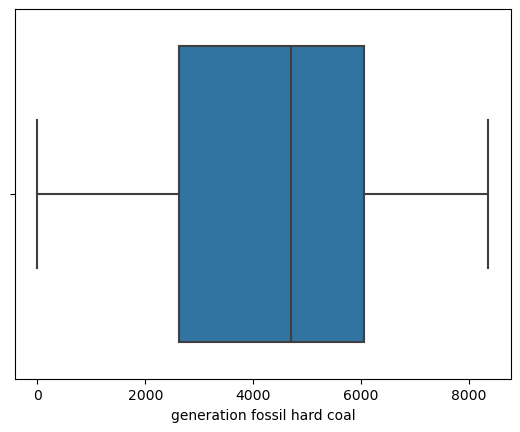

In [19]:
#Boxplot of generation fossil hard coal
sns.boxplot(x = "generation fossil hard coal", data =df)

The boxplot shows no outliers after all the outliers in the dataset has been removed

<Axes: xlabel='total load forecast', ylabel='price actual'>

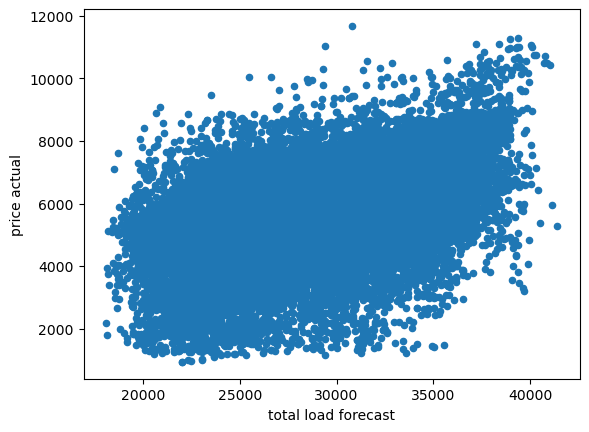

In [20]:
#Scatter plot for total load forecast and price actual
df.plot.scatter(x = "total load forecast", y = "price actual")

The plot shows there is a linear relationship between the two variables

<Axes: xlabel='price day ahead', ylabel='price actual'>

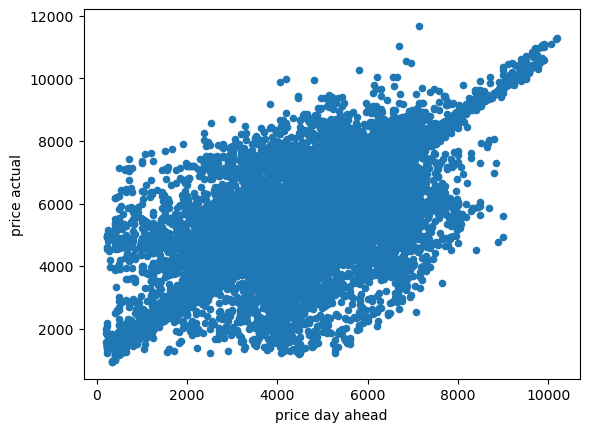

In [21]:
#Scatter plot price day ahead and price actual
df.plot.scatter(x = "price day ahead", y = "price actual")

The plot shows there is a linear relationship between the two variables

In [22]:
X = df.drop(["price actual"], axis = 1)
y = df["price actual"].apply(int)
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test= train_test_split(X,y, random_state = 42)

In [23]:
X_train.isna().sum()

generation biomass                             13
generation fossil gas                          13
generation fossil hard coal                    13
generation fossil oil                          14
generation hydro pumped storage consumption    14
generation hydro run-of-river and poundage     14
generation hydro water reservoir               13
generation nuclear                             12
generation other                               13
generation other renewable                     13
generation solar                               13
generation waste                               14
generation wind onshore                        13
forecast solar day ahead                        0
forecast wind onshore day ahead                 0
total load forecast                             0
total load actual                              29
price day ahead                                 0
Year                                            0
Month                                           0


## **Prepare the Data**

In [24]:
## Instantiate the column selectors, SimpleImputer and OneHotEncoder
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

In [25]:
#Instantiate categorical and numerical selector
cat_selector = make_column_selector(dtype_include = "object")
num_selector = make_column_selector(dtype_include = "number")

In [26]:
#Dealing with categorical 'and numerical missing values
freq_impute = SimpleImputer(strategy = "most_frequent")
mean_impute = SimpleImputer(strategy = "median")
scaler = StandardScaler()
ohe = OneHotEncoder(handle_unknown = 'ignore', sparse = False)

In [27]:
#make pipelines
#numerical pipelines
from sklearn.pipeline import make_pipeline
num_pipe = make_pipeline(mean_impute, scaler)
num_pipe

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('standardscaler', StandardScaler())])

In [28]:
#categorical pipeline
cat_pipe = make_pipeline(freq_impute, ohe)
cat_pipe

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='most_frequent')),
                ('onehotencoder',
                 OneHotEncoder(handle_unknown='ignore', sparse=False))])

In [29]:
#Instantiate column transformer
num_tuple = (num_pipe, num_selector)
cat_tuple = (cat_pipe, cat_selector)
preprocessor = make_column_transformer(num_tuple, cat_tuple)
preprocessor

ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x0000024440ED2770>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x0000024444BF8E80>)])

In [30]:
preprocessor.fit(X_train)

ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x0000024440ED2770>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x0000024444BF8E80>)])

In [31]:
X_train_trans = preprocessor.transform(X_train)
X_test_trans = preprocessor.transform(X_test)

In [32]:
print(np.isnan(X_train_trans).sum(), "missing value in training data")
print(np.isnan(X_test_trans).sum(), "missing value in testing data")

0 missing value in training data
0 missing value in testing data


In [33]:
print (X_train_trans, "Transformed train dataset", '\n')
print (X_test_trans, "Transformed test dataset")


[[-1.5491975   1.26229832  1.10162104 ... -0.08574099 -0.30038406
   0.21328889]
 [-1.42544548  0.36749858  0.59606753 ... -1.49933639 -1.09523659
   0.06888621]
 [-0.90793702  0.49323986  0.87019871 ...  1.6105735   1.62997209
   0.35769157]
 ...
 [ 0.10457953 -0.45026249 -0.84262451 ... -1.21661731 -1.20878696
   1.22410766]
 [-1.05418941 -0.00308399  0.64821205 ...  1.04513534  0.49446847
  -1.08633525]
 [-0.0866736   0.80847856  0.54441963 ...  0.76241626 -0.41393442
   0.50209425]] Transformed train dataset 

[[-1.49294658 -0.60389708 -0.16424918 ...  1.04513534 -1.20878696
  -1.08633525]
 [-0.36792819 -0.62027887 -0.34452022 ...  0.19697809  1.289321
  -0.94193256]
 [ 0.9595935  -0.12218401 -0.57544594 ...  0.19697809 -1.43588768
   1.51291302]
 ...
 [-0.61543224  0.1496651   0.81308805 ... -1.49933639 -0.52748479
   1.22410766]
 [-0.12042415  1.00904476  0.55087562 ...  0.19697809  1.51642173
   1.51291302]
 [-0.4354293  -0.44406398  0.65466804 ... -1.49933639 -0.30038406
  -1.3

## **Baseline Modelling Without PCA**

In [34]:
#import modelling libraries
from catboost import CatBoostRegressor
import xgboost as xgb
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

cat = CatBoostRegressor()
model = xgb.XGBRegressor()
knn = KNeighborsRegressor()

cat_pipeline = make_pipeline(preprocessor, cat)
model_pipeline = make_pipeline(preprocessor, model)
knn_pipeline = make_pipeline(preprocessor, knn)


# Train the models on the training data
cat_pipeline.fit(X_train, y_train)
model_pipeline.fit(X_train, y_train)
knn_pipeline.fit(X_train, y_train)

Learning rate set to 0.066047
0:	learn: 1372.0857388	total: 178ms	remaining: 2m 57s
1:	learn: 1318.4566368	total: 233ms	remaining: 1m 56s
2:	learn: 1269.0702096	total: 266ms	remaining: 1m 28s
3:	learn: 1227.3398340	total: 305ms	remaining: 1m 15s
4:	learn: 1186.5070513	total: 329ms	remaining: 1m 5s
5:	learn: 1148.5648946	total: 357ms	remaining: 59.1s
6:	learn: 1113.1631350	total: 384ms	remaining: 54.5s
7:	learn: 1082.5422658	total: 426ms	remaining: 52.8s
8:	learn: 1051.5664485	total: 492ms	remaining: 54.2s
9:	learn: 1019.9155967	total: 525ms	remaining: 52s
10:	learn: 993.1682151	total: 552ms	remaining: 49.7s
11:	learn: 966.3350683	total: 584ms	remaining: 48.1s
12:	learn: 943.8861568	total: 616ms	remaining: 46.8s
13:	learn: 921.1594619	total: 645ms	remaining: 45.4s
14:	learn: 901.5224765	total: 672ms	remaining: 44.2s
15:	learn: 883.8876839	total: 697ms	remaining: 42.9s
16:	learn: 867.9704380	total: 751ms	remaining: 43.4s
17:	learn: 851.7180982	total: 787ms	remaining: 42.9s
18:	learn: 836

158:	learn: 456.1203147	total: 6.61s	remaining: 35s
159:	learn: 455.8604935	total: 6.64s	remaining: 34.9s
160:	learn: 455.2470959	total: 6.67s	remaining: 34.8s
161:	learn: 454.5755552	total: 6.7s	remaining: 34.7s
162:	learn: 453.8208830	total: 6.72s	remaining: 34.5s
163:	learn: 452.9624247	total: 6.75s	remaining: 34.4s
164:	learn: 452.4838068	total: 6.81s	remaining: 34.5s
165:	learn: 451.4359115	total: 6.85s	remaining: 34.4s
166:	learn: 450.6240616	total: 6.88s	remaining: 34.3s
167:	learn: 450.1603690	total: 6.91s	remaining: 34.2s
168:	learn: 449.6644981	total: 6.93s	remaining: 34.1s
169:	learn: 449.3154770	total: 6.96s	remaining: 34s
170:	learn: 448.5647630	total: 6.98s	remaining: 33.9s
171:	learn: 448.0848021	total: 7.01s	remaining: 33.7s
172:	learn: 446.9725735	total: 7.03s	remaining: 33.6s
173:	learn: 446.3130353	total: 7.06s	remaining: 33.5s
174:	learn: 445.4489567	total: 7.1s	remaining: 33.5s
175:	learn: 444.5928672	total: 7.13s	remaining: 33.4s
176:	learn: 443.9616880	total: 7.1

314:	learn: 381.7414804	total: 11.8s	remaining: 25.6s
315:	learn: 381.5245151	total: 11.8s	remaining: 25.6s
316:	learn: 381.1252390	total: 11.9s	remaining: 25.6s
317:	learn: 380.8538093	total: 11.9s	remaining: 25.5s
318:	learn: 380.5475538	total: 11.9s	remaining: 25.5s
319:	learn: 380.1615625	total: 12s	remaining: 25.4s
320:	learn: 379.7486616	total: 12s	remaining: 25.4s
321:	learn: 379.5442843	total: 12s	remaining: 25.3s
322:	learn: 379.4717096	total: 12.1s	remaining: 25.3s
323:	learn: 378.9777568	total: 12.1s	remaining: 25.2s
324:	learn: 378.6277212	total: 12.1s	remaining: 25.2s
325:	learn: 378.1804683	total: 12.1s	remaining: 25.1s
326:	learn: 377.8196868	total: 12.2s	remaining: 25.1s
327:	learn: 377.3999807	total: 12.2s	remaining: 25s
328:	learn: 377.3015081	total: 12.2s	remaining: 25s
329:	learn: 376.9101180	total: 12.3s	remaining: 24.9s
330:	learn: 376.4671068	total: 12.3s	remaining: 24.9s
331:	learn: 376.1838067	total: 12.3s	remaining: 24.8s
332:	learn: 375.6214234	total: 12.3s	r

468:	learn: 336.6617643	total: 17.5s	remaining: 19.8s
469:	learn: 336.5094525	total: 17.5s	remaining: 19.8s
470:	learn: 336.3183034	total: 17.6s	remaining: 19.8s
471:	learn: 336.2984864	total: 17.6s	remaining: 19.7s
472:	learn: 336.1399555	total: 17.7s	remaining: 19.7s
473:	learn: 335.9017508	total: 17.7s	remaining: 19.7s
474:	learn: 335.6962282	total: 17.8s	remaining: 19.6s
475:	learn: 335.5680416	total: 17.8s	remaining: 19.6s
476:	learn: 335.3557841	total: 17.8s	remaining: 19.6s
477:	learn: 335.0929283	total: 17.9s	remaining: 19.5s
478:	learn: 334.9798600	total: 17.9s	remaining: 19.5s
479:	learn: 334.6115003	total: 17.9s	remaining: 19.4s
480:	learn: 334.4249664	total: 18s	remaining: 19.4s
481:	learn: 334.2560222	total: 18s	remaining: 19.3s
482:	learn: 334.0549070	total: 18s	remaining: 19.3s
483:	learn: 333.7148171	total: 18s	remaining: 19.2s
484:	learn: 333.5259192	total: 18.1s	remaining: 19.2s
485:	learn: 333.5218290	total: 18.1s	remaining: 19.1s
486:	learn: 333.3552429	total: 18.1s

626:	learn: 305.5810736	total: 22.8s	remaining: 13.6s
627:	learn: 305.4770214	total: 22.8s	remaining: 13.5s
628:	learn: 305.3625274	total: 22.9s	remaining: 13.5s
629:	learn: 305.2074965	total: 22.9s	remaining: 13.4s
630:	learn: 305.0238857	total: 22.9s	remaining: 13.4s
631:	learn: 304.8977291	total: 22.9s	remaining: 13.4s
632:	learn: 304.8167725	total: 23s	remaining: 13.3s
633:	learn: 304.5856310	total: 23.1s	remaining: 13.3s
634:	learn: 304.3528221	total: 23.1s	remaining: 13.3s
635:	learn: 304.1490387	total: 23.1s	remaining: 13.2s
636:	learn: 304.0403734	total: 23.2s	remaining: 13.2s
637:	learn: 303.9273086	total: 23.2s	remaining: 13.2s
638:	learn: 303.7779232	total: 23.2s	remaining: 13.1s
639:	learn: 303.6344608	total: 23.3s	remaining: 13.1s
640:	learn: 303.5289937	total: 23.3s	remaining: 13s
641:	learn: 303.3917241	total: 23.3s	remaining: 13s
642:	learn: 303.2026231	total: 23.4s	remaining: 13s
643:	learn: 302.9451875	total: 23.4s	remaining: 12.9s
644:	learn: 302.8366820	total: 23.4s

780:	learn: 280.2909474	total: 28s	remaining: 7.86s
781:	learn: 280.1791891	total: 28.1s	remaining: 7.82s
782:	learn: 280.1001001	total: 28.1s	remaining: 7.79s
783:	learn: 280.0107865	total: 28.2s	remaining: 7.76s
784:	learn: 279.8257484	total: 28.2s	remaining: 7.72s
785:	learn: 279.6223362	total: 28.3s	remaining: 7.69s
786:	learn: 279.5410311	total: 28.3s	remaining: 7.66s
787:	learn: 279.3622793	total: 28.3s	remaining: 7.62s
788:	learn: 279.2292404	total: 28.3s	remaining: 7.58s
789:	learn: 279.1362552	total: 28.4s	remaining: 7.54s
790:	learn: 279.0000558	total: 28.4s	remaining: 7.5s
791:	learn: 278.9227298	total: 28.4s	remaining: 7.46s
792:	learn: 278.8676191	total: 28.4s	remaining: 7.42s
793:	learn: 278.6999100	total: 28.5s	remaining: 7.39s
794:	learn: 278.6317914	total: 28.5s	remaining: 7.35s
795:	learn: 278.5100363	total: 28.5s	remaining: 7.32s
796:	learn: 278.4702480	total: 28.6s	remaining: 7.28s
797:	learn: 278.3279426	total: 28.6s	remaining: 7.24s
798:	learn: 278.1374012	total: 

933:	learn: 261.2254905	total: 33.7s	remaining: 2.38s
934:	learn: 261.0720491	total: 33.7s	remaining: 2.34s
935:	learn: 260.9713716	total: 33.7s	remaining: 2.31s
936:	learn: 260.8301331	total: 33.8s	remaining: 2.27s
937:	learn: 260.7012230	total: 33.8s	remaining: 2.23s
938:	learn: 260.5969421	total: 33.8s	remaining: 2.2s
939:	learn: 260.4617869	total: 33.9s	remaining: 2.16s
940:	learn: 260.3595461	total: 33.9s	remaining: 2.13s
941:	learn: 260.2358991	total: 34s	remaining: 2.09s
942:	learn: 260.0627993	total: 34s	remaining: 2.06s
943:	learn: 259.9710810	total: 34.1s	remaining: 2.02s
944:	learn: 259.8595043	total: 34.1s	remaining: 1.99s
945:	learn: 259.7976917	total: 34.2s	remaining: 1.95s
946:	learn: 259.6824704	total: 34.2s	remaining: 1.91s
947:	learn: 259.5601848	total: 34.2s	remaining: 1.88s
948:	learn: 259.4730949	total: 34.2s	remaining: 1.84s
949:	learn: 259.4280597	total: 34.3s	remaining: 1.8s
950:	learn: 259.3157510	total: 34.3s	remaining: 1.77s
951:	learn: 259.1082309	total: 34.

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x0000024440ED2770>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x0000024444BF8E80>)])),
                ('kneighborsregressor', KNeighborsRegressor())])

In [35]:
from sklearn.metrics import mean_squared_error

def calculate_rmse(models, datasets):
    for model_name, model in models.items():
        train_X, train_y = datasets['train']
        test_X, test_y = datasets['test']

        # Make predictions on the training and test sets
        train_preds = model.predict(train_X)
        test_preds = model.predict(test_X)

        # Calculate the RMSE on the training and test sets
        train_rmse = np.sqrt(mean_squared_error(train_y, train_preds))
        test_rmse = np.sqrt(mean_squared_error(test_y, test_preds))

        # Print the results
        print(f"{model_name} training RMSE: {train_rmse:.3f}")
        print(f"{model_name} test RMSE: {test_rmse:.3f}")
        print()

# Package the models and datasets into dictionaries
models = {"Catboost": cat_pipeline, "Xgboost": model_pipeline, "KNN": knn_pipeline}
datasets = {"train":(X_train, y_train), "test": (X_test, y_test)}

# Calculate and print the RMSE for each model on both the training and test sets
calculate_rmse(models, datasets)

Catboost training RMSE: 253.046
Catboost test RMSE: 312.756

Xgboost training RMSE: 219.472
Xgboost test RMSE: 340.698

KNN training RMSE: 340.294
KNN test RMSE: 444.962



## **GridSearchCV**

In [36]:
#Catboost Gridsearch
gs_cat =  CatBoostRegressor()
cat_param_grid = {
    'iterations': [1, 2, 3],  # Number of boosting iterations
    'learning_rate': [0.01, 0.1, 0.2],  # Learning rate for boosting
    'depth': [4, 6, 8],  # Maximum depth of tree
    'l2_leaf_reg': [0.1, 1, 10],}  # L2 regularization coefficient

In [37]:
from sklearn.model_selection import GridSearchCV
cat_pipe_gs = GridSearchCV(gs_cat, cat_param_grid, cv = 3)

cat_pipe_gs.fit(X_train_trans, y_train)
print('Best Catboost Parameters:')
print(cat_pipe_gs.best_params_)
best_pipe = cat_pipe_gs.best_estimator_
print(round(np.sqrt(mean_squared_error(y_train, best_pipe.predict(X_train_trans))),4))


0:	learn: 1422.2301587	total: 14ms	remaining: 0us
0:	learn: 1405.5739763	total: 17.6ms	remaining: 0us
0:	learn: 1420.1537640	total: 22ms	remaining: 0us
0:	learn: 1355.6607765	total: 19ms	remaining: 0us
0:	learn: 1338.8722805	total: 19.3ms	remaining: 0us
0:	learn: 1354.7948106	total: 17.1ms	remaining: 0us
0:	learn: 1285.6907572	total: 14.6ms	remaining: 0us
0:	learn: 1268.7102644	total: 18.2ms	remaining: 0us
0:	learn: 1286.1594904	total: 23.2ms	remaining: 0us
0:	learn: 1422.2352944	total: 17.4ms	remaining: 0us
0:	learn: 1405.5791706	total: 25.5ms	remaining: 0us
0:	learn: 1420.1588615	total: 25.1ms	remaining: 0us
0:	learn: 1355.7097585	total: 71.1ms	remaining: 0us
0:	learn: 1338.9218554	total: 17.9ms	remaining: 0us
0:	learn: 1354.8433888	total: 34.6ms	remaining: 0us
0:	learn: 1285.7825793	total: 18.6ms	remaining: 0us
0:	learn: 1268.8032756	total: 22.3ms	remaining: 0us
0:	learn: 1286.2504643	total: 24.7ms	remaining: 0us
0:	learn: 1422.2862466	total: 39.5ms	remaining: 0us
0:	learn: 1405.630

0:	learn: 1269.7265625	total: 13.9ms	remaining: 27.9ms
1:	learn: 1168.7706628	total: 26.4ms	remaining: 13.2ms
2:	learn: 1086.3106581	total: 42.5ms	remaining: 0us
0:	learn: 1287.1535091	total: 16.4ms	remaining: 32.8ms
1:	learn: 1188.1348103	total: 52.9ms	remaining: 26.5ms
2:	learn: 1098.7842022	total: 90.1ms	remaining: 0us
0:	learn: 1421.7832476	total: 33.1ms	remaining: 0us
0:	learn: 1405.1667265	total: 105ms	remaining: 0us
0:	learn: 1419.7247512	total: 53.9ms	remaining: 0us
0:	learn: 1351.1767238	total: 83.5ms	remaining: 0us
0:	learn: 1334.7837650	total: 64.9ms	remaining: 0us
0:	learn: 1350.4940887	total: 83.1ms	remaining: 0us
0:	learn: 1276.7137449	total: 56ms	remaining: 0us
0:	learn: 1260.5191847	total: 60.2ms	remaining: 0us
0:	learn: 1277.5587206	total: 73.3ms	remaining: 0us
0:	learn: 1421.8035103	total: 58.8ms	remaining: 0us
0:	learn: 1405.1873550	total: 69ms	remaining: 0us
0:	learn: 1419.7452711	total: 65.6ms	remaining: 0us
0:	learn: 1351.3707002	total: 64.6ms	remaining: 0us
0:	le

0:	learn: 1352.3621009	total: 45.2ms	remaining: 90.5ms
1:	learn: 1275.5457944	total: 77.7ms	remaining: 38.9ms
2:	learn: 1210.1541276	total: 118ms	remaining: 0us
0:	learn: 1280.4100983	total: 26.5ms	remaining: 53.1ms
1:	learn: 1150.0852674	total: 50.5ms	remaining: 25.2ms
2:	learn: 1045.4118743	total: 78ms	remaining: 0us
0:	learn: 1264.5512640	total: 79.5ms	remaining: 159ms
1:	learn: 1132.3577130	total: 179ms	remaining: 89.7ms
2:	learn: 1025.8638302	total: 234ms	remaining: 0us
0:	learn: 1281.0881396	total: 46.8ms	remaining: 93.5ms
1:	learn: 1149.7931378	total: 121ms	remaining: 60.5ms
2:	learn: 1047.6797371	total: 173ms	remaining: 0us
0:	learn: 1421.1366381	total: 155ms	remaining: 0us
0:	learn: 1404.5077643	total: 166ms	remaining: 0us
0:	learn: 1418.9763888	total: 55.3ms	remaining: 0us
0:	learn: 1344.6636259	total: 210ms	remaining: 0us
0:	learn: 1328.1429160	total: 161ms	remaining: 0us
0:	learn: 1342.9610656	total: 264ms	remaining: 0us
0:	learn: 1263.6112002	total: 65.4ms	remaining: 0us
0

2:	learn: 1191.4124279	total: 672ms	remaining: 0us
0:	learn: 1333.3664961	total: 105ms	remaining: 211ms
1:	learn: 1258.1856386	total: 234ms	remaining: 117ms
2:	learn: 1189.5561587	total: 356ms	remaining: 0us
0:	learn: 1348.2657070	total: 66.5ms	remaining: 133ms
1:	learn: 1266.4055141	total: 123ms	remaining: 61.3ms
2:	learn: 1196.0333358	total: 175ms	remaining: 0us
0:	learn: 1273.4649881	total: 163ms	remaining: 325ms
1:	learn: 1128.2231444	total: 250ms	remaining: 125ms
2:	learn: 1021.1814987	total: 445ms	remaining: 0us
0:	learn: 1257.1627048	total: 327ms	remaining: 654ms
1:	learn: 1107.3654792	total: 535ms	remaining: 267ms
2:	learn: 1000.3558868	total: 687ms	remaining: 0us
0:	learn: 1272.5865022	total: 80ms	remaining: 160ms
1:	learn: 1134.1907260	total: 186ms	remaining: 92.8ms
2:	learn: 1030.8391822	total: 339ms	remaining: 0us
0:	learn: 1247.0274729	total: 67.3ms	remaining: 135ms
1:	learn: 1095.7430170	total: 175ms	remaining: 87.7ms
2:	learn: 978.9079095	total: 249ms	remaining: 0us
Best

In [38]:
print("Catboost Test RMSE:{}".format (np.sqrt(mean_squared_error(y_test, best_pipe.predict(X_test)))))

Catboost Test RMSE:1783.116801034684


In [39]:
#Xgboost Gridsearch
xgb = xgb.XGBRegressor()

xgb_params = {'learning_rate': [0.01, 0.02, 0.03],
    'max_depth': [1, 2, 3],
    'min_child_weight': [0.1, 0.2, 0.3],
    'gamma': [0, 1, 2]}

In [40]:
gs_xgb = GridSearchCV(xgb, xgb_params, cv = 3)

gs_xgb.fit(X_train_trans, y_train)
print('Best Xgboost Parameters:')
print(gs_xgb.best_params_)
xgb_best = gs_xgb.best_estimator_
print(round(np.sqrt(mean_squared_error(y_train, xgb_best.predict(X_train_trans))),4))
print("\n")
print(round(np.sqrt(mean_squared_error(y_test, xgb_best.predict(X_test_trans))),4))

Best Xgboost Parameters:
{'gamma': 0, 'learning_rate': 0.03, 'max_depth': 3, 'min_child_weight': 0.1}
783.8373


785.8097


In [43]:
#knn gridsearchcv
gs_knn =  KNeighborsRegressor()
pipe_param_grid = {'n_neighbors': range(1,5),
              'p': range(1,3),
              'weights': ['distance','uniform']}

In [46]:
knn_gs = GridSearchCV(gs_knn, pipe_param_grid, cv =3)

knn_gs.fit(X_train_trans, y_train)
print('Best KNN Parameters:')
print(knn_gs.best_params_)
knn_best= knn_gs.best_estimator_
print(round(np.sqrt(mean_squared_error(y_train, knn_best.predict(X_train_trans))),4))
print("\n")
print(round(np.sqrt(mean_squared_error(y_test, knn_best.predict(X_test_trans))),4))

Best KNN Parameters:
{'n_neighbors': 2, 'p': 1, 'weights': 'distance'}
0.0


337.0327


### **Using PCA along side with feature engineers done above**

In [61]:
from sklearn.decomposition import PCA
cat_pipeline_pca = make_pipeline(preprocessor, PCA(n_components=.95))
model_pipeline_pca = make_pipeline(preprocessor, PCA(n_components=.95))
knn_pipeline_pca = make_pipeline(preprocessor, PCA(n_components=.95))
                          
cat_pipeline = make_pipeline(cat_pipeline_pca, cat)                             
model_pipeline = make_pipeline(model_pipeline_pca, model)
knn_pipeline = make_pipeline(knn_pipeline_pca, knn)

# Train the models on the training data
cat_pipeline.fit(X_train, y_train)
model_pipeline.fit(X_train, y_train)
knn_pipeline.fit(X_train, y_train)

Learning rate set to 0.066047
0:	learn: 1386.3071989	total: 36.1ms	remaining: 36.1s
1:	learn: 1354.3725086	total: 91.5ms	remaining: 45.6s
2:	learn: 1323.7089231	total: 131ms	remaining: 43.6s
3:	learn: 1295.1781407	total: 172ms	remaining: 42.9s
4:	learn: 1268.1643485	total: 214ms	remaining: 42.6s
5:	learn: 1244.2257816	total: 250ms	remaining: 41.5s
6:	learn: 1221.0377098	total: 288ms	remaining: 40.9s
7:	learn: 1197.7925749	total: 327ms	remaining: 40.6s
8:	learn: 1177.1971000	total: 403ms	remaining: 44.3s
9:	learn: 1158.5234114	total: 494ms	remaining: 48.9s
10:	learn: 1139.1811536	total: 568ms	remaining: 51s
11:	learn: 1124.7801505	total: 632ms	remaining: 52.1s
12:	learn: 1110.2708150	total: 676ms	remaining: 51.3s
13:	learn: 1097.6436478	total: 761ms	remaining: 53.6s
14:	learn: 1086.2284336	total: 835ms	remaining: 54.8s
15:	learn: 1074.3283765	total: 926ms	remaining: 56.9s
16:	learn: 1064.2752741	total: 989ms	remaining: 57.2s
17:	learn: 1052.8132416	total: 1.13s	remaining: 1m 1s
18:	lear

154:	learn: 709.3417135	total: 9.52s	remaining: 51.9s
155:	learn: 708.6961544	total: 9.56s	remaining: 51.7s
156:	learn: 707.8542173	total: 9.61s	remaining: 51.6s
157:	learn: 707.1300119	total: 9.69s	remaining: 51.7s
158:	learn: 706.4381216	total: 9.8s	remaining: 51.9s
159:	learn: 705.3002226	total: 9.89s	remaining: 51.9s
160:	learn: 704.1479385	total: 9.98s	remaining: 52s
161:	learn: 703.0455771	total: 10s	remaining: 51.9s
162:	learn: 702.2773925	total: 10.1s	remaining: 51.7s
163:	learn: 701.5921297	total: 10.1s	remaining: 51.5s
164:	learn: 700.6836216	total: 10.2s	remaining: 51.4s
165:	learn: 700.0242082	total: 10.2s	remaining: 51.2s
166:	learn: 699.3020885	total: 10.2s	remaining: 51.1s
167:	learn: 698.3426849	total: 10.3s	remaining: 50.9s
168:	learn: 697.3830811	total: 10.4s	remaining: 50.9s
169:	learn: 696.1745881	total: 10.4s	remaining: 50.8s
170:	learn: 695.3817727	total: 10.4s	remaining: 50.6s
171:	learn: 693.9778427	total: 10.5s	remaining: 50.5s
172:	learn: 693.3758455	total: 10

312:	learn: 598.4698750	total: 18.7s	remaining: 41s
313:	learn: 598.0047065	total: 18.7s	remaining: 40.9s
314:	learn: 597.4713667	total: 18.7s	remaining: 40.8s
315:	learn: 597.0665499	total: 18.8s	remaining: 40.8s
316:	learn: 596.3459719	total: 18.9s	remaining: 40.7s
317:	learn: 596.0377552	total: 19s	remaining: 40.7s
318:	learn: 595.8088484	total: 19.1s	remaining: 40.7s
319:	learn: 595.5084660	total: 19.2s	remaining: 40.7s
320:	learn: 595.0773006	total: 19.3s	remaining: 40.7s
321:	learn: 594.1817711	total: 19.3s	remaining: 40.7s
322:	learn: 593.5018461	total: 19.4s	remaining: 40.7s
323:	learn: 592.9398850	total: 19.5s	remaining: 40.7s
324:	learn: 592.5307713	total: 19.5s	remaining: 40.6s
325:	learn: 592.2318907	total: 19.6s	remaining: 40.4s
326:	learn: 591.8036834	total: 19.6s	remaining: 40.3s
327:	learn: 591.2832507	total: 19.6s	remaining: 40.2s
328:	learn: 590.7814135	total: 19.7s	remaining: 40.1s
329:	learn: 590.1455740	total: 19.7s	remaining: 40s
330:	learn: 589.6489502	total: 19.

465:	learn: 533.8066558	total: 27.6s	remaining: 31.6s
466:	learn: 533.3898335	total: 27.7s	remaining: 31.6s
467:	learn: 533.1812336	total: 27.8s	remaining: 31.6s
468:	learn: 532.8473373	total: 27.8s	remaining: 31.5s
469:	learn: 532.4917738	total: 27.9s	remaining: 31.5s
470:	learn: 532.1920758	total: 27.9s	remaining: 31.4s
471:	learn: 531.8111230	total: 28s	remaining: 31.3s
472:	learn: 531.5924448	total: 28s	remaining: 31.2s
473:	learn: 531.2548150	total: 28.1s	remaining: 31.2s
474:	learn: 530.8767806	total: 28.2s	remaining: 31.1s
475:	learn: 530.3309721	total: 28.2s	remaining: 31.1s
476:	learn: 529.9372536	total: 28.3s	remaining: 31s
477:	learn: 529.5139320	total: 28.3s	remaining: 30.9s
478:	learn: 529.2299129	total: 28.4s	remaining: 30.8s
479:	learn: 528.9430934	total: 28.4s	remaining: 30.8s
480:	learn: 528.5797629	total: 28.4s	remaining: 30.7s
481:	learn: 528.2208264	total: 28.5s	remaining: 30.6s
482:	learn: 527.9061079	total: 28.5s	remaining: 30.5s
483:	learn: 527.5889865	total: 28.

618:	learn: 488.3577093	total: 36s	remaining: 22.1s
619:	learn: 488.2037202	total: 36s	remaining: 22.1s
620:	learn: 487.8416264	total: 36.1s	remaining: 22s
621:	learn: 487.6164799	total: 36.1s	remaining: 21.9s
622:	learn: 487.4340236	total: 36.2s	remaining: 21.9s
623:	learn: 487.2007962	total: 36.3s	remaining: 21.9s
624:	learn: 487.0616671	total: 36.3s	remaining: 21.8s
625:	learn: 486.8357908	total: 36.4s	remaining: 21.7s
626:	learn: 486.5503142	total: 36.4s	remaining: 21.7s
627:	learn: 486.1639915	total: 36.5s	remaining: 21.6s
628:	learn: 485.8138764	total: 36.5s	remaining: 21.5s
629:	learn: 485.4759465	total: 36.6s	remaining: 21.5s
630:	learn: 485.2617479	total: 36.6s	remaining: 21.4s
631:	learn: 485.0940257	total: 36.7s	remaining: 21.4s
632:	learn: 484.5230140	total: 36.7s	remaining: 21.3s
633:	learn: 484.3443575	total: 36.8s	remaining: 21.2s
634:	learn: 484.0659320	total: 36.8s	remaining: 21.1s
635:	learn: 483.8767370	total: 36.8s	remaining: 21.1s
636:	learn: 483.6480636	total: 36.

774:	learn: 452.8956283	total: 44.9s	remaining: 13s
775:	learn: 452.7284487	total: 44.9s	remaining: 13s
776:	learn: 452.5633480	total: 45s	remaining: 12.9s
777:	learn: 452.4128008	total: 45s	remaining: 12.8s
778:	learn: 452.3319910	total: 45.1s	remaining: 12.8s
779:	learn: 452.2047073	total: 45.2s	remaining: 12.7s
780:	learn: 452.0909275	total: 45.2s	remaining: 12.7s
781:	learn: 451.8785821	total: 45.3s	remaining: 12.6s
782:	learn: 451.7320761	total: 45.4s	remaining: 12.6s
783:	learn: 451.5952667	total: 45.4s	remaining: 12.5s
784:	learn: 451.3030540	total: 45.5s	remaining: 12.5s
785:	learn: 451.1506986	total: 45.5s	remaining: 12.4s
786:	learn: 450.9914915	total: 45.6s	remaining: 12.3s
787:	learn: 450.7900336	total: 45.7s	remaining: 12.3s
788:	learn: 450.6225204	total: 45.8s	remaining: 12.2s
789:	learn: 450.4833652	total: 45.8s	remaining: 12.2s
790:	learn: 450.3438731	total: 45.8s	remaining: 12.1s
791:	learn: 450.2214394	total: 45.9s	remaining: 12s
792:	learn: 449.9875440	total: 45.9s	r

932:	learn: 424.6957841	total: 54.1s	remaining: 3.88s
933:	learn: 424.4854496	total: 54.1s	remaining: 3.82s
934:	learn: 424.3303316	total: 54.1s	remaining: 3.76s
935:	learn: 424.2020211	total: 54.1s	remaining: 3.7s
936:	learn: 423.9868674	total: 54.2s	remaining: 3.64s
937:	learn: 423.8357630	total: 54.2s	remaining: 3.58s
938:	learn: 423.6701180	total: 54.2s	remaining: 3.52s
939:	learn: 423.5232994	total: 54.2s	remaining: 3.46s
940:	learn: 423.3837645	total: 54.3s	remaining: 3.41s
941:	learn: 423.2392602	total: 54.4s	remaining: 3.35s
942:	learn: 423.0639391	total: 54.4s	remaining: 3.29s
943:	learn: 422.8789335	total: 54.5s	remaining: 3.23s
944:	learn: 422.6518416	total: 54.5s	remaining: 3.17s
945:	learn: 422.4076775	total: 54.6s	remaining: 3.11s
946:	learn: 422.2172146	total: 54.6s	remaining: 3.06s
947:	learn: 421.9762977	total: 54.7s	remaining: 3s
948:	learn: 421.8774687	total: 54.8s	remaining: 2.94s
949:	learn: 421.6582166	total: 54.9s	remaining: 2.89s
950:	learn: 421.5055884	total: 5

Pipeline(steps=[('pipeline',
                 Pipeline(steps=[('columntransformer',
                                  ColumnTransformer(transformers=[('pipeline-1',
                                                                   Pipeline(steps=[('simpleimputer',
                                                                                    SimpleImputer(strategy='median')),
                                                                                   ('standardscaler',
                                                                                    StandardScaler())]),
                                                                   <sklearn.compose._column_transformer.make_column_selector object at 0x0000024440ED2770>),
                                                                  ('pipeline-2',
                                                                   Pipeline(steps=[('simpleimputer',
                                                                                    SimpleImputer(strategy='most_frequent')),
                                                                                   ('onehotencoder',
                                                                                    OneHotEncoder(handle_unknown='ignore',
                                                                                                  sparse=False))]),
                                                                   <sklearn.compose._column_transformer.make_column_selector object at 0x0000024444BF8E80>)])),
                                 ('pca', PCA(n_components=0.95))])),
                ('kneighborsregressor', KNeighborsRegressor())])

In [62]:
def calculate_rmse_pca(models, datasets):
    for model_name, model in models.items():
        train_X, train_y = datasets['train']
        test_X, test_y = datasets['test']

        # Make predictions on the training and test sets
        train_preds = model.predict(train_X)
        test_preds = model.predict(test_X)

        # Calculate the RMSE on the training and test sets
        train_rmse = np.sqrt(mean_squared_error(train_y, train_preds))
        test_rmse = np.sqrt(mean_squared_error(test_y, test_preds))

        # Print the results
        print(f"{model_name} training RMSE: {train_rmse:.3f}")
        print(f"{model_name} test RMSE: {test_rmse:.3f}")
        print()

# Package the models and datasets into dictionaries
models = {"Catboost": cat_pipeline, "Xgboost": model_pipeline, "KNN": knn_pipeline}
datasets = {"train":(X_train, y_train), "test": (X_test, y_test)}

# Calculate and print the RMSE for each model on both the training and test sets
calculate_rmse_pca(models, datasets)

Catboost training RMSE: 413.657
Catboost test RMSE: 524.751

Xgboost training RMSE: 391.459
Xgboost test RMSE: 580.570

KNN training RMSE: 360.395
KNN test RMSE: 470.881

